# Первичная обработка данных

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import numpy as np

In [93]:
ds = pd.read_csv('housing.csv')

In [94]:
ds.dropna()
ds.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [95]:
ds = ds[ds['total_bedrooms'].isnull() == False]
ds.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Количественные признаки:
<br>
* longitude - долгота
<br>
* latitude - широта
<br>
* housing_median_age - возраст дома
<br>
* total_rooms - количество комнат
<br>
* total_bedrooms - количество спален
<br>
* population - количество проживающих людей
<br>
* households - участки земли вокруг дома
<br>
* median_income - средний доход с человека
<br>
* median_house_value - средняя цена с дома

Факторные признаки:
<br>
* ocean_proximity - близость океана (на острове, на побережье или в часе езды от океана)

In [96]:
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [97]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [98]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Будем предсказывать среднюю цену дома только у домов в часе езды от океана

In [99]:
ds = ds[ds['ocean_proximity']=='<1H OCEAN']
ds.ocean_proximity.value_counts()

<1H OCEAN    9034
Name: ocean_proximity, dtype: int64

Посмотрим на распределения признаков

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

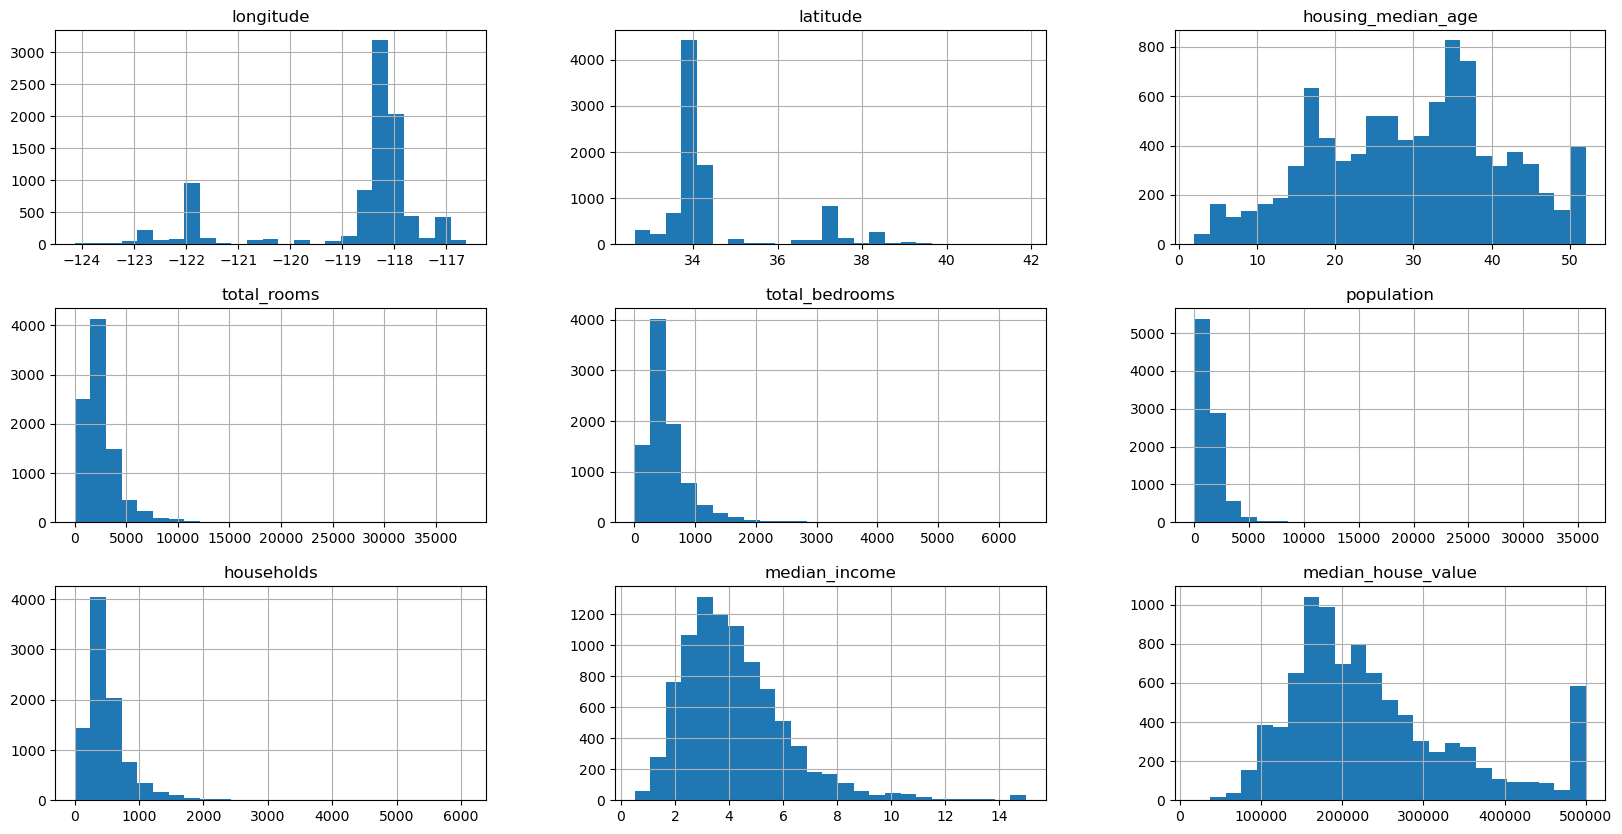

In [100]:
ds.hist(bins=25,figsize=(20,10))

Пролагарифмируем все признаки кроме долготы, ширины и возраста дома

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

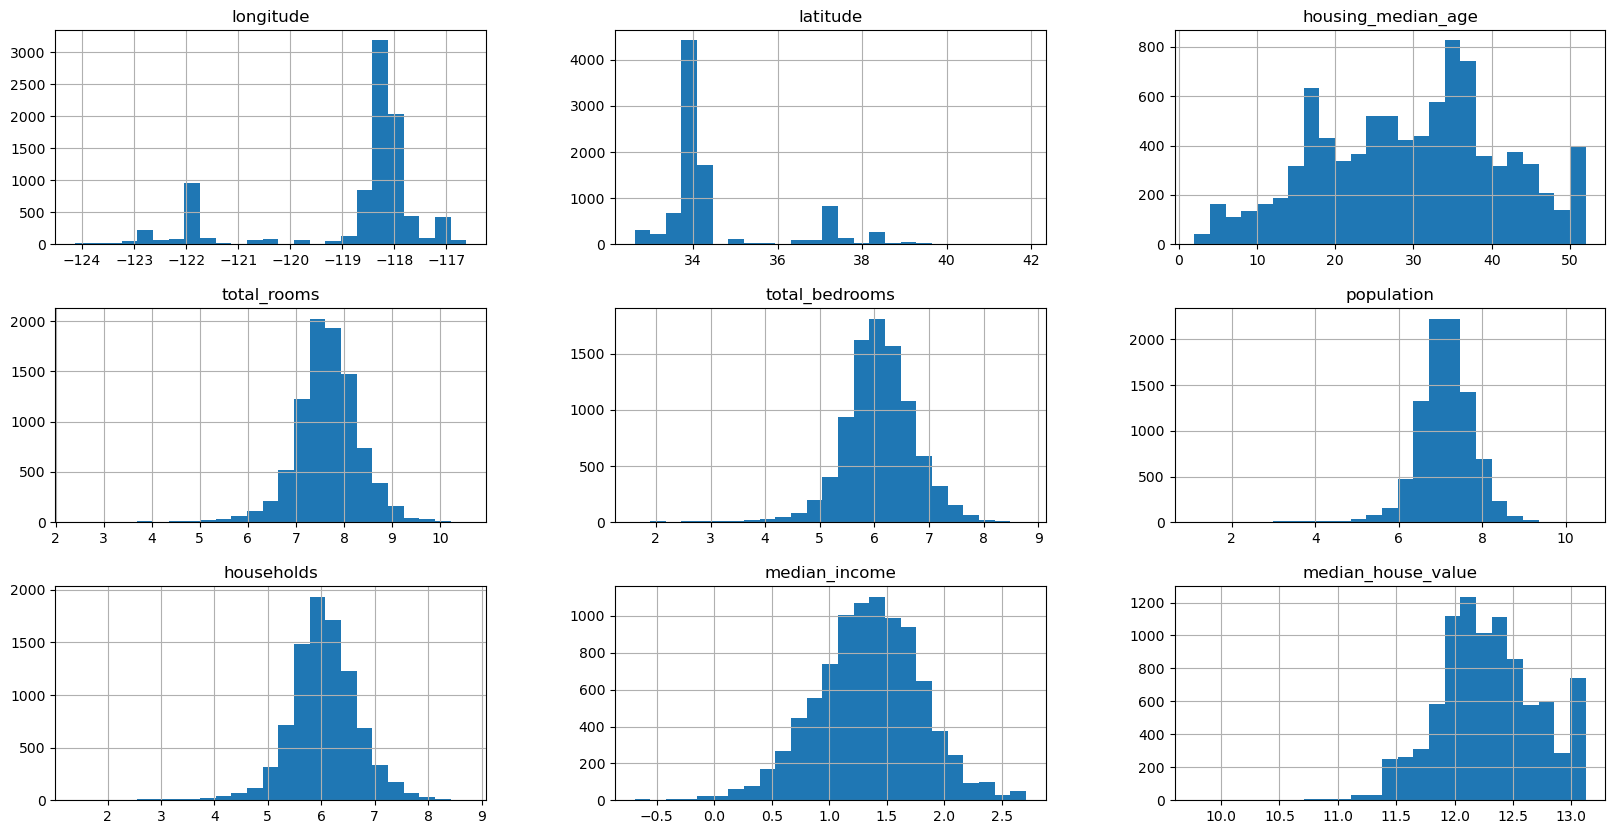

In [101]:
ds['total_rooms'] = np.log(ds['total_rooms'])
ds['total_bedrooms'] = np.log(ds['total_bedrooms'])
ds['population'] = np.log(ds['population'])
ds['households'] = np.log(ds['households'])
ds['median_income'] = np.log(ds['median_income'])
ds['median_house_value'] = np.log(ds['median_house_value'])

ds.hist(bins=25,figsize=(20,10))

Посмотрим на парные распределения признаков

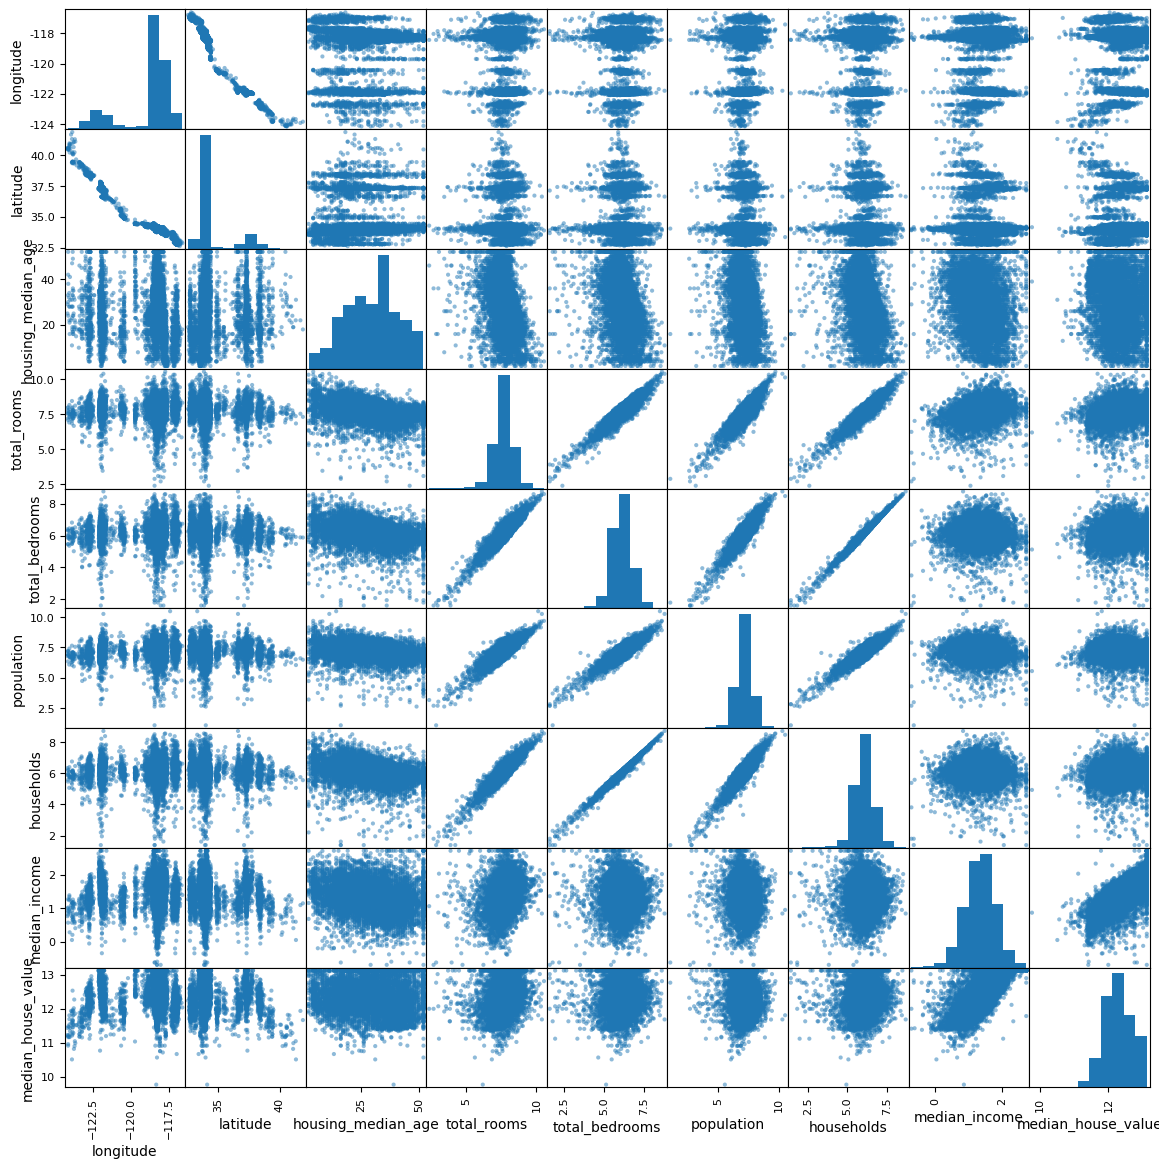

In [102]:
scatter_matrix(ds,  figsize=(14, 14))
plt.show()

Построим распределение средней цены дома в координатах остальных 
количественыных признаков

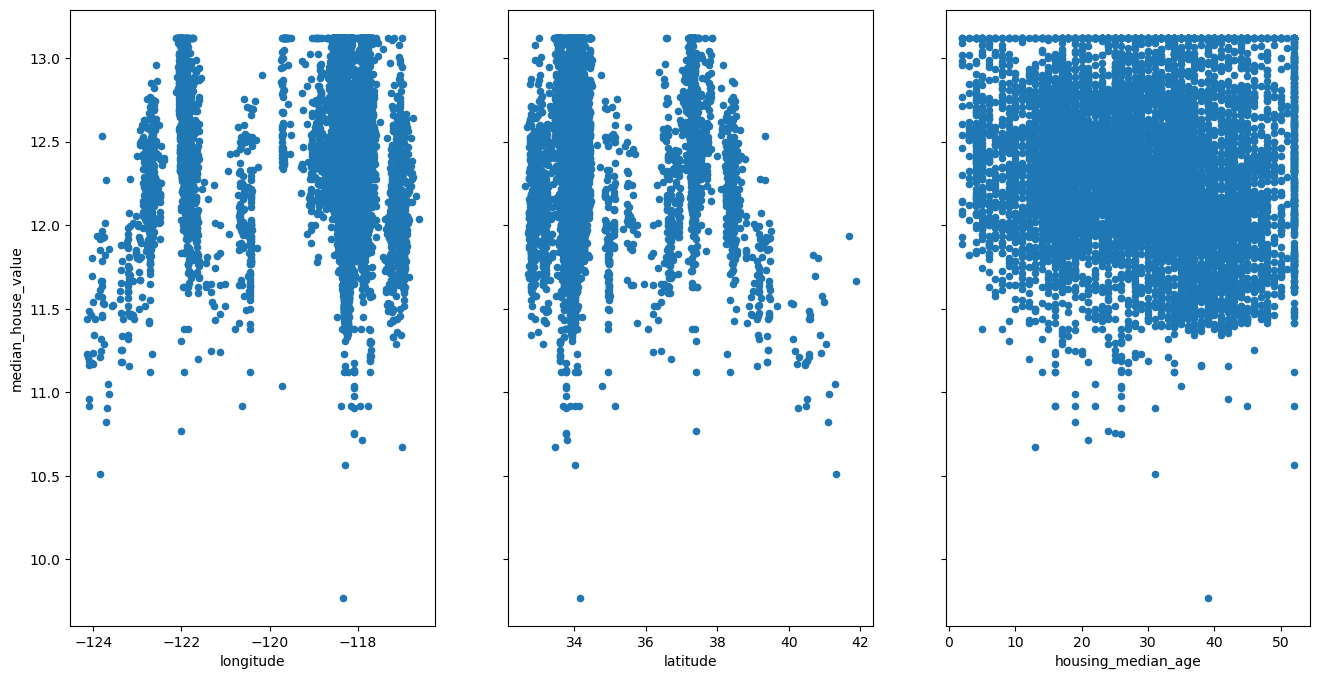

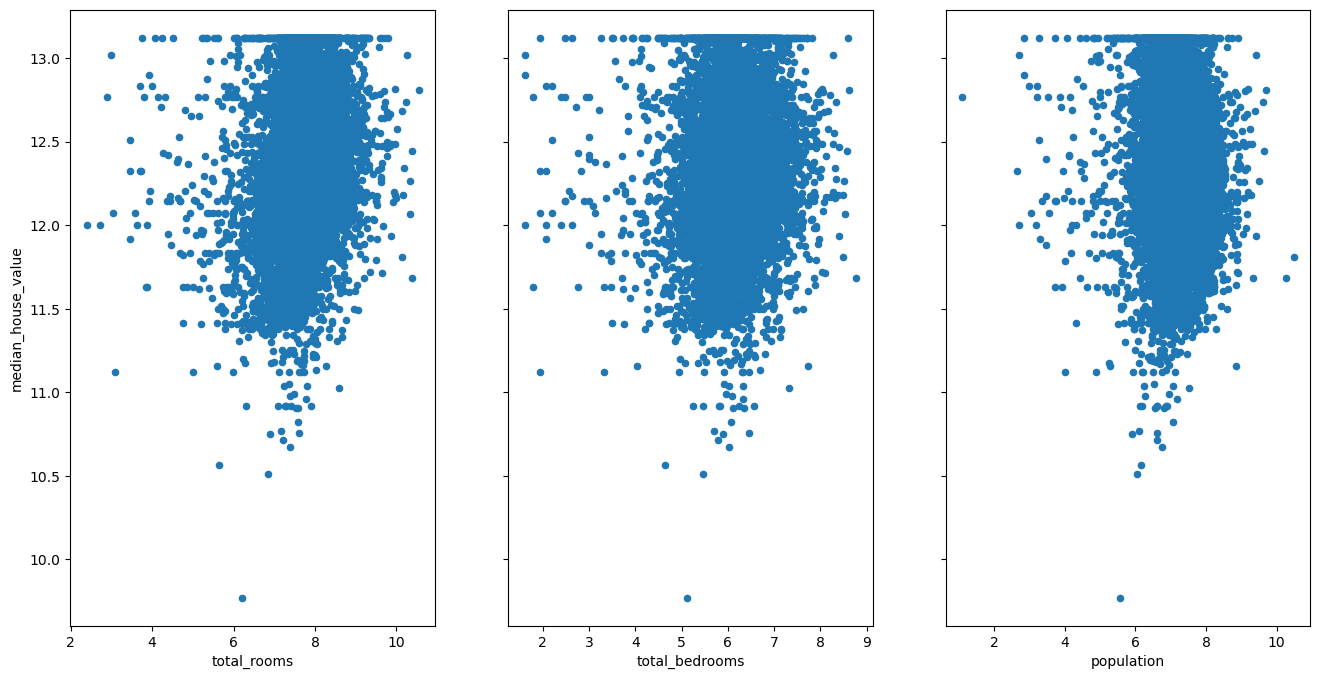

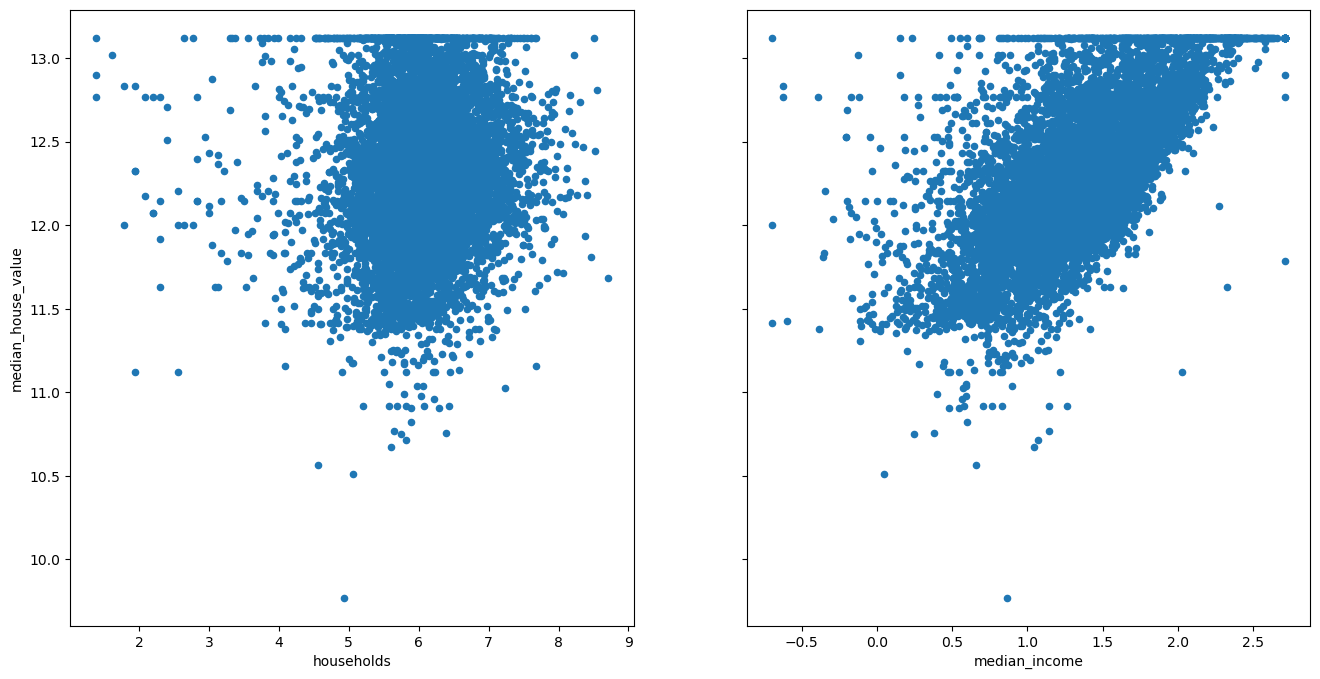

In [103]:
_, axs = plt.subplots(1, 3, sharey=True)
ds.plot(kind='scatter', x='longitude', y='median_house_value', ax=axs[0],figsize=(16, 8))
ds.plot(kind='scatter', x='latitude', y='median_house_value', ax=axs[1])
ds.plot(kind='scatter', x='housing_median_age', y='median_house_value', ax=axs[2])
plt.show()

_, axs = plt.subplots(1, 3, sharey=True)
ds.plot(kind='scatter', x='total_rooms', y='median_house_value', ax=axs[0],figsize=(16, 8))
ds.plot(kind='scatter', x='total_bedrooms', y='median_house_value', ax=axs[1])
ds.plot(kind='scatter', x='population', y='median_house_value', ax=axs[2])
plt.show()

_, axs = plt.subplots(1, 2, sharey=True)
ds.plot(kind='scatter', x='households', y='median_house_value', ax=axs[0],figsize=(16, 8))
ds.plot(kind='scatter', x='median_income', y='median_house_value', ax=axs[1])
plt.show()

In [104]:
ds.corr(method='pearson', numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.984683,0.085142,-0.035338,0.000886,0.034681,0.003509,-0.063933,-0.053326
latitude,-0.984683,1.000000,-0.091609,0.035623,-0.001902,-0.030041,-0.004900,0.058588,0.024597
housing_median_age,0.085142,-0.091609,1.000000,-0.383501,-0.332573,-0.288848,-0.324454,-0.215904,-0.081842
total_rooms,-0.035338,0.035623,-0.383501,1.000000,0.923874,0.846510,0.927059,0.277450,0.232426
total_bedrooms,0.000886,-0.001902,-0.332573,0.923874,1.000000,0.910007,0.993233,-0.033290,0.065406
population,0.034681,-0.030041,-0.288848,0.846510,0.910007,1.000000,0.920610,-0.061591,-0.083683
households,0.003509,-0.004900,-0.324454,0.927059,0.993233,0.920610,1.000000,-0.013915,0.069622
median_income,-0.063933,0.058588,-0.215904,0.277450,-0.033290,-0.061591,-0.013915,1.000000,0.663066
median_house_value,-0.053326,0.024597,-0.081842,0.232426,0.065406,-0.083683,0.069622,0.663066,1.000000


<Axes: >

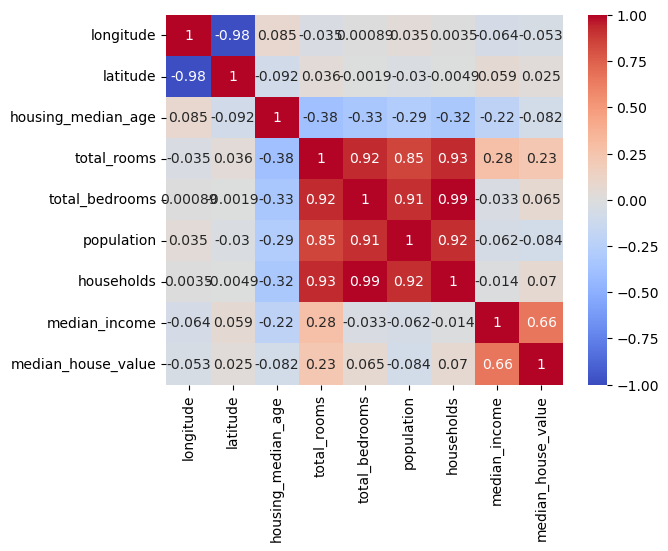

In [105]:
corr = ds.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot = True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Пересохраним исходный датасет, избавившись от longitudee, households, total_bedrooms и от total_rooms, как от мультиколлинеарных  
<br>
Разделим полученые два датасета по отдельности на тренировочную и тестовую выборку и на выборку для определения гиперпараметра в соотношении 0.5, 0.25 и 0.25 от исходного датасета соотвественно

<Axes: >

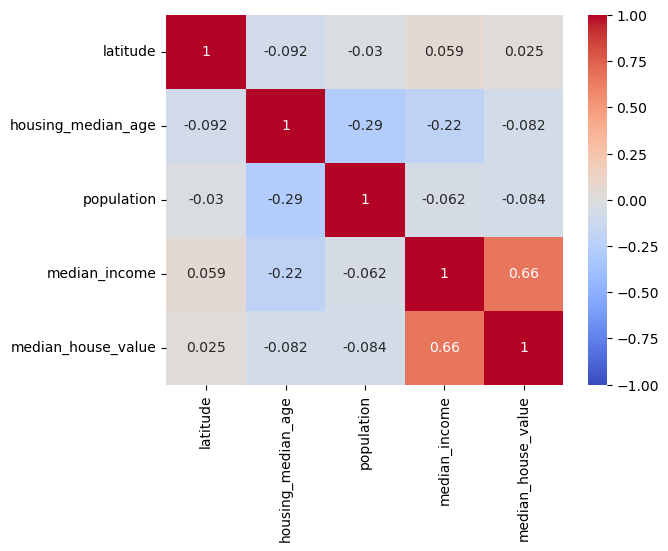

In [106]:
ds = ds.drop(columns=['ocean_proximity'])
ds_correct = ds
ds_correct = ds_correct.drop(columns=['longitude','households', 'total_bedrooms', 'total_rooms'])
corr = ds_correct.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot = True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Множественная линейная регрессия без стандартизации

In [107]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ds, test_size=0.5, random_state=13)
test, evo = train_test_split(test, test_size=0.5, random_state=14)

In [108]:
test_correct = test.drop(columns=['longitude','households', 'total_bedrooms', 'total_rooms'])
train_correct = train.drop(columns=['longitude','households', 'total_bedrooms', 'total_rooms'])
evo_correct = evo.drop(columns=['longitude','households', 'total_bedrooms', 'total_rooms'])

In [109]:
train.info()
test.info()
evo.info()

train_correct.info()
test_correct.info()
evo_correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 17652 to 3561
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4517 non-null   float64
 1   latitude            4517 non-null   float64
 2   housing_median_age  4517 non-null   float64
 3   total_rooms         4517 non-null   float64
 4   total_bedrooms      4517 non-null   float64
 5   population          4517 non-null   float64
 6   households          4517 non-null   float64
 7   median_income       4517 non-null   float64
 8   median_house_value  4517 non-null   float64
dtypes: float64(9)
memory usage: 352.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 11200 to 9513
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2258 non-null   float64
 1   latitude            2258 non-null   float64
 2 

Получим модели множественной линейной регрессии для полных данных и для данных без мультиколлинеарных признаков

In [110]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='median_house_value ~ longitude + latitude + housing_median_age + total_rooms  + total_bedrooms + population + households + median_income', data=train).fit()

lm_correct = smf.ols(formula='median_house_value ~ latitude + housing_median_age + population  + median_income', data=train_correct).fit()

In [111]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     754.8
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:14:48   Log-Likelihood:                -699.64
No. Observations:                4517   AIC:                             1417.
Df Residuals:                    4508   BIC:                             1475.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3102      1.278     -1.807      0.071      -4.817       0.196
longitude             -0.1731      0.015    -11.173      0.000      -0.204      -0.143
latitude              -0.1854      0.017    -11.067      0.000      -0.218      -0.153
housing_median_age     0.0038      0.000      9.525      0.000       0.003       0.005
total_rooms           -0.2633      0.027     -9.602      0.000      -0.317      -0.210
total_bedrooms         0.5381      0.060      9.029      0.000       0.421       0.655
population            -0.4334      0.017    -26.231      0.000      -0.466      -0.401
households             0.1892      0.061      3.113      0.002       0.070       0.308
median_income          0.7519      0.016     47.094      0.000       0.721       0.783
==============================================================================
Omnibus:                      548.685   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5630.627
Skew:                           0.124   Prob(JB):                         0.00
Kurtosis:                       8.464   Cond. No.                     3.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
lm_correct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     928.8
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:14:48   Log-Likelihood:                -1262.5
No. Observations:                4517   AIC:                             2535.
Df Residuals:                    4512   BIC:                             2567.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.4080      0.131     87.255      0.000      11.152      11.664
latitude               0.0004      0.003      0.136      0.892      -0.006       0.007
housing_median_age     0.0023      0.000      5.212      0.000       0.001       0.003
population            -0.0086      0.008     -1.136      0.256      -0.024       0.006
median_income          0.6456      0.011     59.539      0.000       0.624       0.667
==============================================================================
Omnibus:                      412.801   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1169.125
Skew:                           0.497   Prob(JB):                    1.34e-254
Kurtosis:                       5.285   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Сравнение моделей на тестовых данных

In [113]:
preds = lm.predict(test)
preds_correct = lm_correct.predict(test_correct)

In [114]:
preds = lm.predict(test)
preds_correct = lm_correct.predict(test)

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(test['median_house_value'], preds)
mse_correct = mean_squared_error(test['median_house_value'], preds_correct)

print('MSE without feature selection: {}'.format(np.round(mse,2)))
print('MSE with feature selection: {}'.format(np.round(mse_correct,2)))


MSE without feature selection: 0.08
MSE with feature selection: 0.1


Видим, что MSE при обучении на полной выборке, меньше, чем при обучении на выборке с мультиколлинеарностью 
<br>
Можно было увидеть по информационным критериями, что модель, обученная по полным данным, более информативная

# Множественная линейная регрессия со стандартизованными данными

Проведем то же самое, но со стандартизованными даннами

In [115]:
train = (train-train.mean())/train.std()
test = (test-test.mean())/test.std()
evo = (evo-evo.mean())/evo.std()

train_correct = (train_correct-train_correct.mean())/train_correct.std()
test_correct = (test_correct-test_correct.mean())/test_correct.std()
evo_correct = (evo_correct-evo_correct.mean())/evo_correct.std()


In [116]:
lm = smf.ols(formula='median_house_value ~ longitude + latitude + housing_median_age + total_rooms  + total_bedrooms + population + households + median_income', data=train).fit()

lm_correct = smf.ols(formula='median_house_value ~ latitude + housing_median_age + population  + median_income', data=train_correct).fit()

In [117]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     754.8
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:14:48   Log-Likelihood:                -4489.2
No. Observations:                4517   AIC:                             8996.
Df Residuals:                    4508   BIC:                             9054.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.583e-16      0.010   6.76e-14      1.000      -0.019       0.019
longitude             -0.6493      0.058    -11.173      0.000      -0.763      -0.535
latitude              -0.6434      0.058    -11.067      0.000      -0.757      -0.529
housing_median_age     0.1028      0.011      9.525      0.000       0.082       0.124
total_rooms           -0.4265      0.044     -9.602      0.000      -0.514      -0.339
total_bedrooms         0.8461      0.094      9.029      0.000       0.662       1.030
population            -0.6669      0.025    -26.231      0.000      -0.717      -0.617
households             0.2922      0.094      3.113      0.002       0.108       0.476
median_income          0.7946      0.017     47.094      0.000       0.762       0.828
==============================================================================
Omnibus:                      548.685   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5630.627
Skew:                           0.124   Prob(JB):                         0.00
Kurtosis:                       8.464   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
lm_correct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     928.8
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:14:48   Log-Likelihood:                -5052.1
No. Observations:                4517   AIC:                         1.011e+04
Df Residuals:                    4512   BIC:                         1.015e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.583e-16      0.011   5.97e-14      1.000      -0.022       0.022
latitude               0.0015      0.011      0.136      0.892      -0.020       0.023
housing_median_age     0.0628      0.012      5.212      0.000       0.039       0.086
population            -0.0133      0.012     -1.136      0.256      -0.036       0.010
median_income          0.6822      0.011     59.539      0.000       0.660       0.705
==============================================================================
Omnibus:                      412.801   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1169.125
Skew:                           0.497   Prob(JB):                    1.34e-254
Kurtosis:                       5.285   Cond. No.                         1.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
preds = lm.predict(test)
preds_correct = lm_correct.predict(test)

mse = mean_squared_error(test['median_house_value'], preds)
mse_correct = mean_squared_error(test['median_house_value'], preds_correct)

vanilla_mse = mse

print('test MSE without feature selection: {}'.format(np.round(mse,8)))
print('test MSE with feature selection: {}'.format(np.round(mse_correct,8)))


test MSE without feature selection: 0.44153259
test MSE with feature selection: 0.5578423


Среднее квадратическое отклонение при отборе признаков все еще оказалось хуже

# Регуляризация: Ridge и Lasso

Lasso:

In [120]:

from sklearn.linear_model import Lasso, Ridge

model = Lasso(alpha=0.001) 
model.fit(train.drop(columns=['median_house_value']),train['median_house_value'])

pred_train = model.predict(train.drop(columns=['median_house_value']))
pred_test = model.predict(test.drop(columns=['median_house_value']))
pred_evo = model.predict(evo.drop(columns=['median_house_value']))

print("Train MSE", mean_squared_error(train['median_house_value'],pred_train))
print("Test MSE", mean_squared_error(test['median_house_value'],pred_test))

vanilla_mse_train = mean_squared_error(train['median_house_value'],pred_train)
vanilla_mse_evo = mean_squared_error(evo['median_house_value'],pred_evo)
vanilla_mse_test = mean_squared_error(test['median_house_value'],pred_test)

Train MSE 0.4275731691929973
Test MSE 0.44164118914816525


In [121]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11200,0.568563,-0.474458,-1.741582,-0.810195,-0.246995,-0.769616,-0.364228,-2.669848,-0.497244
3803,0.231546,-0.208417,-0.280009,0.463937,0.619702,0.677999,0.628514,0.187068,0.105941
3469,0.205621,-0.145407,-1.139758,0.268240,0.335412,0.927468,0.451091,-0.066719,-0.278027
7846,0.406535,-0.432451,0.751690,-2.043932,-1.950554,-1.711177,-1.978202,-1.203556,-0.956398
8713,0.270432,-0.460456,0.407791,0.222350,-0.112331,0.048961,-0.009640,1.065177,1.063997
...,...,...,...,...,...,...,...,...,...
8532,0.283394,-0.432451,-0.022084,0.499341,0.697146,0.835798,0.725921,-0.081673,0.131609
6979,0.497271,-0.376443,0.407791,-0.113160,-0.575834,-0.491459,-0.452479,1.060943,0.868252
8863,0.263951,-0.313433,1.955339,-0.637884,-1.009084,-1.125198,-1.039319,1.547336,1.957558
15089,1.210191,-1.195568,0.321816,-0.431448,-0.704515,-0.542373,-0.625031,-0.136367,-0.700945


Ridge:

In [122]:
model = Ridge(alpha=50) 
model.fit(train.drop(columns=['median_house_value']),train['median_house_value'])

pred_train = model.predict(train.drop(columns=['median_house_value']))
pred_test = model.predict(test.drop(columns=['median_house_value']))

print("Train MSE", mean_squared_error(train['median_house_value'],pred_train))
print("Test MSE", mean_squared_error(test['median_house_value'],pred_test))

Train MSE 0.4323506123828782
Test MSE 0.44488814767156143


Подбор параметра регуляризации для Lasso:

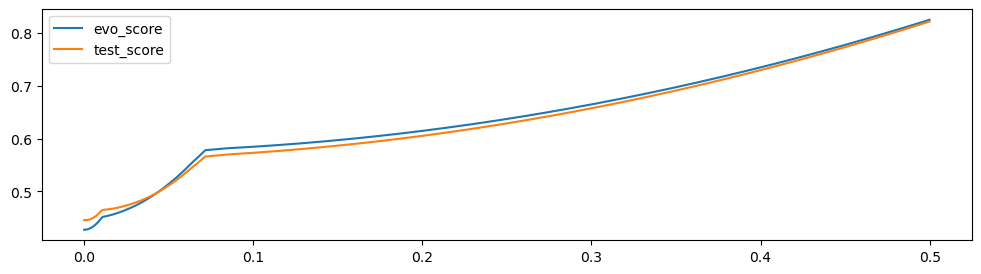

In [123]:
import numpy as np
runs = []
for alpha in np.arange(0.0001, 0.5, 0.0001):

    model = Lasso(alpha=alpha) 
    model.fit(evo.drop(columns=['median_house_value']),evo['median_house_value'])

    pred_train = model.predict(evo.drop(columns=['median_house_value']))
    pred_test = model.predict(test.drop(columns=['median_house_value']))
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "evo_mse": mean_squared_error(evo['median_house_value'],pred_train),
        "test_mse": mean_squared_error(test['median_house_value'],pred_test,),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["evo_mse"] for run in runs], label="evo_score")
plt.plot([run["alpha"] for run in runs], [run["test_mse"] for run in runs], label="test_score")
plt.legend()
plt.show()

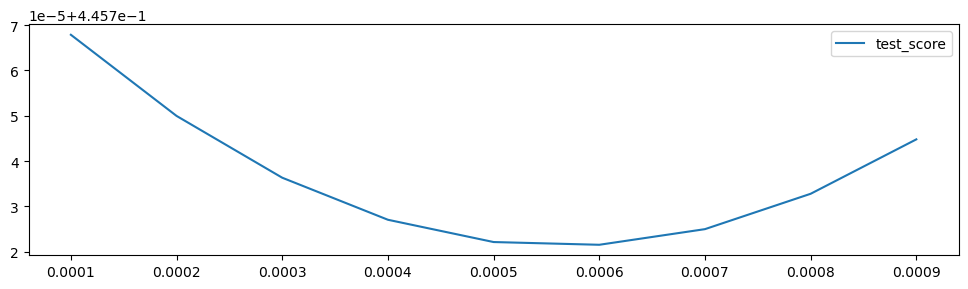

In [124]:

runs = []
for alpha in np.arange(0.0001, 0.001, 0.0001):

    model = Lasso(alpha=alpha) 
    model.fit(evo.drop(columns=['median_house_value']),evo['median_house_value'])

    pred_train = model.predict(evo.drop(columns=['median_house_value']))
    pred_test = model.predict(test.drop(columns=['median_house_value']))
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "test_mse": mean_squared_error(test['median_house_value'],pred_test,),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["test_mse"] for run in runs], label="test_score")
plt.legend()
plt.show()

Для Lasso выберем параметр 0.0006

In [125]:
model = Lasso(alpha=0.0006) 
model.fit(train.drop(columns=['median_house_value']),train['median_house_value'])

pred_test = model.predict(test.drop(columns=['median_house_value']))
pred_train = model.predict(train.drop(columns=['median_house_value']))
pred_evo = model.predict(evo.drop(columns=['median_house_value']))

print("Test MSE", mean_squared_error(test['median_house_value'],pred_test))

Lasso_mse_train = mean_squared_error(train['median_house_value'],pred_train)
Lasso_mse_evo = mean_squared_error(evo['median_house_value'],pred_evo)
Lasso_mse_test = mean_squared_error(test['median_house_value'],pred_test)

Test MSE 0.44153501247816995


Подбор параметра регуляризации для Ridge:

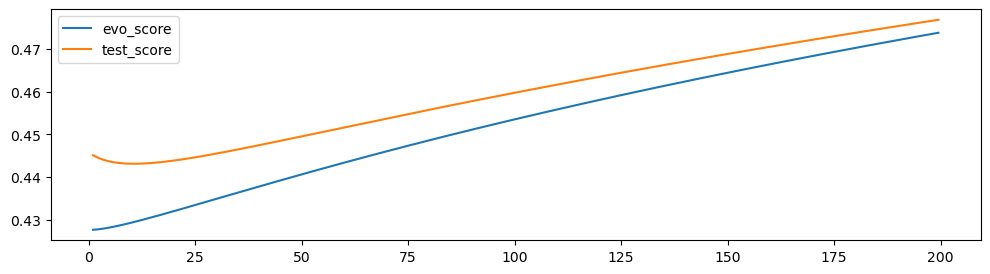

In [126]:
runs = []
for alpha in np.arange(1, 200, 0.5):
    
    model = Ridge(alpha=alpha) 
    model.fit(evo.drop(columns=['median_house_value']),evo['median_house_value'])

    pred_train = model.predict(evo.drop(columns=['median_house_value']))
    pred_test = model.predict(test.drop(columns=['median_house_value']))
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "evo_mse": mean_squared_error(evo['median_house_value'],pred_train),
        "test_mse": mean_squared_error(test['median_house_value'],pred_test),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["evo_mse"] for run in runs], label="evo_score")
plt.plot([run["alpha"] for run in runs], [run["test_mse"] for run in runs], label="test_score")
plt.legend()
plt.show()

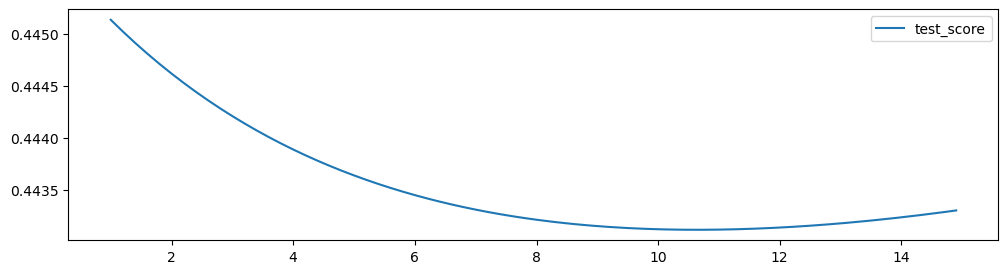

In [127]:
runs = []
for alpha in np.arange(1, 15, 0.1):
    
    model = Ridge(alpha=alpha) 
    model.fit(evo.drop(columns=['median_house_value']),evo['median_house_value'])

    pred_test = model.predict(test.drop(columns=['median_house_value']))
    
    runs.append({
        "alpha": alpha,
        "coef": model.coef_,
        "test_mse": mean_squared_error(test['median_house_value'],pred_test),
    })
    
    
plt.figure(figsize=(12,3))
plt.plot([run["alpha"] for run in runs], [run["test_mse"] for run in runs], label="test_score")
plt.legend()
plt.show()

Для Ridge выберем параметр 10.5

In [128]:
model = Ridge(alpha=10.5) 
model.fit(train.drop(columns=['median_house_value']),train['median_house_value'])

pred_test = model.predict(test.drop(columns=['median_house_value']))
pred_train = model.predict(train.drop(columns=['median_house_value']))
pred_evo = model.predict(evo.drop(columns=['median_house_value']))

print("Test MSE", mean_squared_error(test['median_house_value'],pred_test))

Ridge_mse_test = mean_squared_error(test['median_house_value'],pred_test)
Ridge_mse_train = mean_squared_error(train['median_house_value'],pred_train)
Ridge_mse_evo = mean_squared_error(evo['median_house_value'],pred_evo)

Test MSE 0.4411613335055076


Выводы:

In [130]:
print("LR without regularization:")
print("train MSE without regularization", vanilla_mse_train)
print("evo MSE without regularization", vanilla_mse_evo)
print("test MSE without regularization", vanilla_mse_test)
print("Lasso:")
print("train MSE with Lasso regularization", Lasso_mse_train)
print("evo MSE with Lasso regularization", Lasso_mse_evo)
print("test MSE with Lasso regularization", Lasso_mse_test)
print("Ridge:")
print("train MSE with Ridge regularization", Ridge_mse_train)
print("evo MSE with Ridge regularization", Ridge_mse_evo)
print("test MSE with Ridge regularization", Ridge_mse_test)

LR without regularization:
train MSE without regularization 0.4275731691929973
evo MSE without regularization 0.430980519135285
test MSE without regularization 0.44164118914816525
Lasso:
train MSE with Lasso regularization 0.4274219692402254
evo MSE with Lasso regularization 0.4308789832596046
test MSE with Lasso regularization 0.44153501247816995
Ridge:
train MSE with Ridge regularization 0.42778637335728825
evo MSE with Ridge regularization 0.4317769521555332
test MSE with Ridge regularization 0.4411613335055076


# PCA для Feature extraction 

In [85]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(train.drop(columns=['median_house_value']))
principal.components_

array([[ 0.01615071, -0.01792117,  0.23314573, -0.4843063 , -0.49269136,
        -0.47058279, -0.49424384, -0.04515033],
       [-0.69486994,  0.69471008, -0.11178923,  0.01759447, -0.03557822,
        -0.06081836, -0.03586227,  0.12440451]])

Text(0, 0.5, 'pc2')

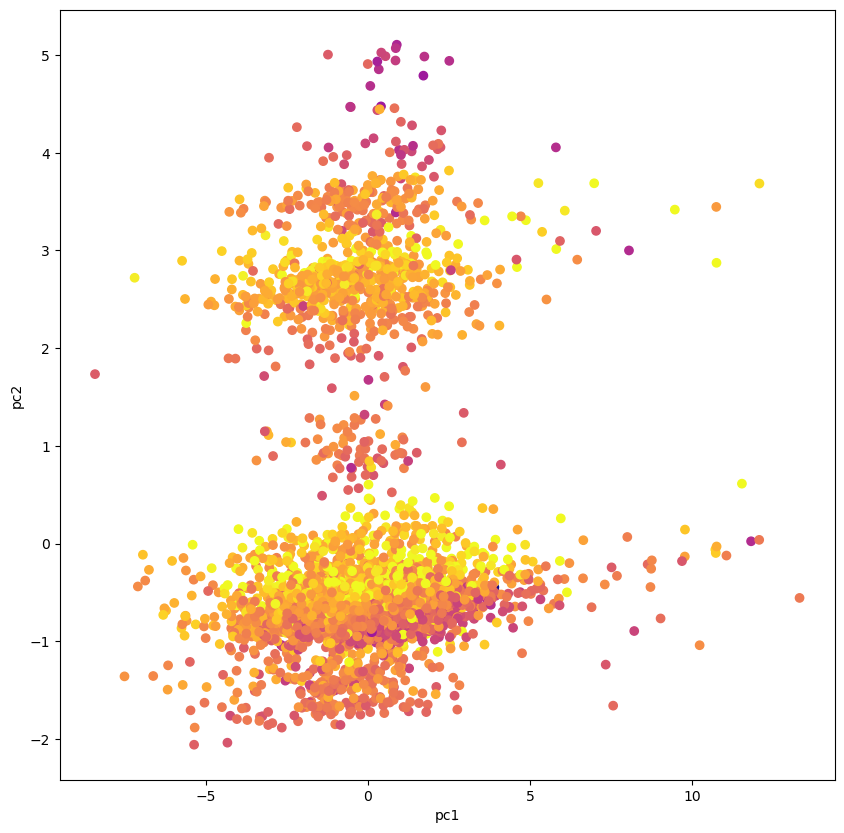

In [46]:
x=principal.transform(train.drop(columns=['median_house_value']))
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=train['median_house_value'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0, 0.5, 'median_house_value')

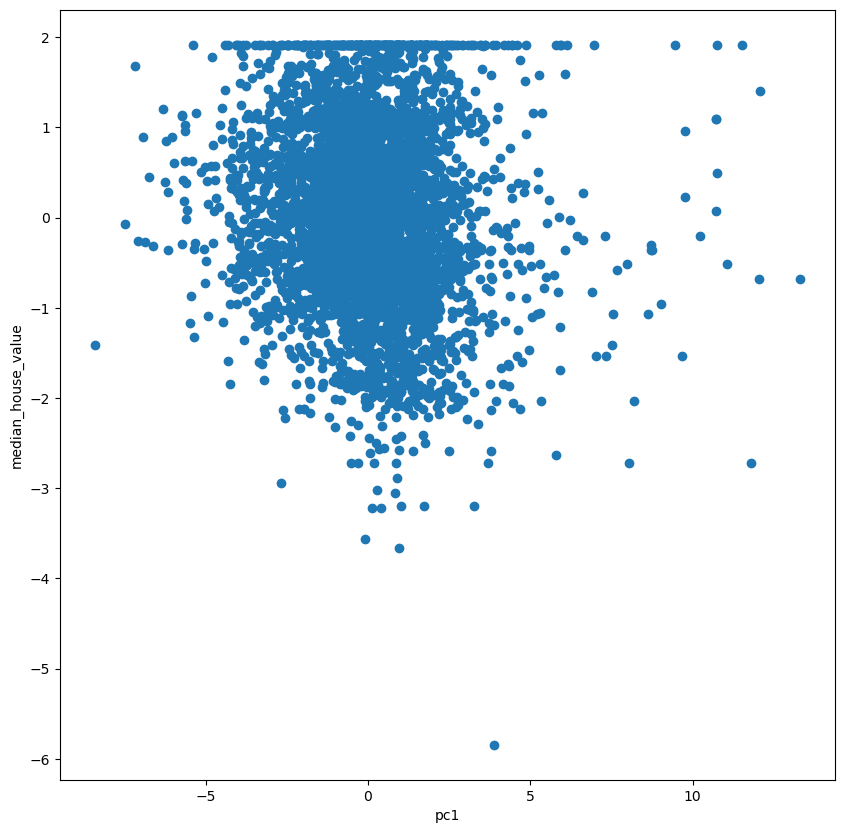

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],train['median_house_value'])
plt.xlabel('pc1')
plt.ylabel('median_house_value')

Text(0, 0.5, 'median_house_value')

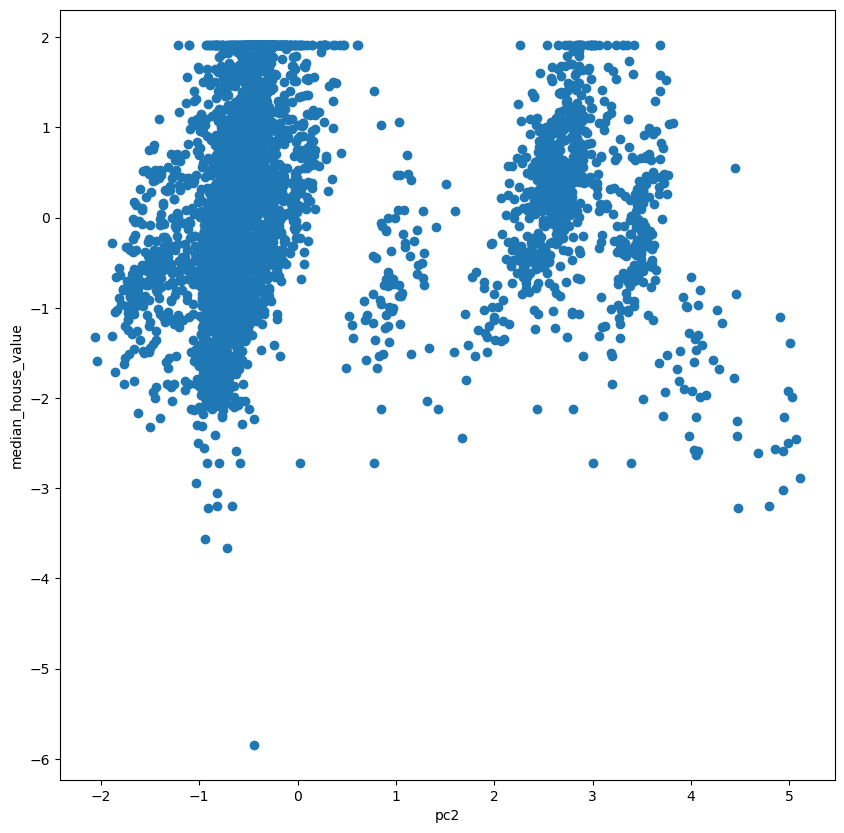

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,1],train['median_house_value'])
plt.xlabel('pc2')
plt.ylabel('median_house_value')

In [49]:
principal=PCA(n_components=3)
principal.fit(train.drop(columns=['median_house_value']))
principal.components_

array([[ 0.01615071, -0.01792117,  0.23314573, -0.4843063 , -0.49269136,
        -0.47058279, -0.49424384, -0.04515033],
       [-0.69486994,  0.69471008, -0.11178923,  0.01759447, -0.03557822,
        -0.06081836, -0.03586227,  0.12440451],
       [-0.1254822 ,  0.12743793,  0.46682561, -0.12778553,  0.13347179,
         0.16607112,  0.12052253, -0.82087666]])

Text(0.5, 0, 'PC3')

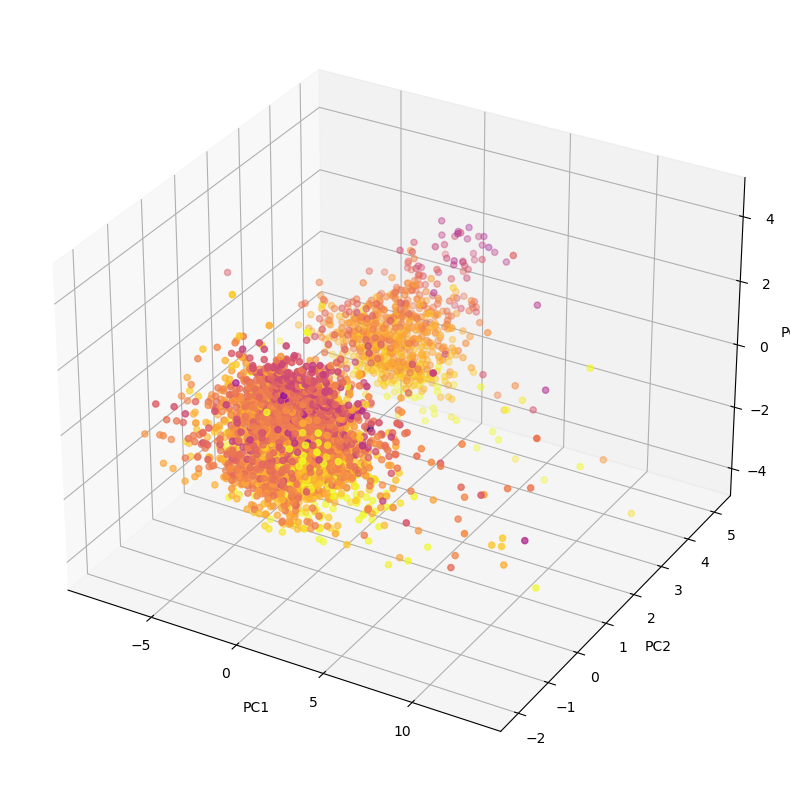

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
x=principal.transform(train.drop(columns=['median_house_value']))
axis = fig.add_subplot(111, projection='3d')

axis.scatter(x[:,0],x[:,1],x[:,2], c=train['median_house_value'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Распределение median_house_value в первых трех ГК

Text(0, 0.5, 'median_house_value')

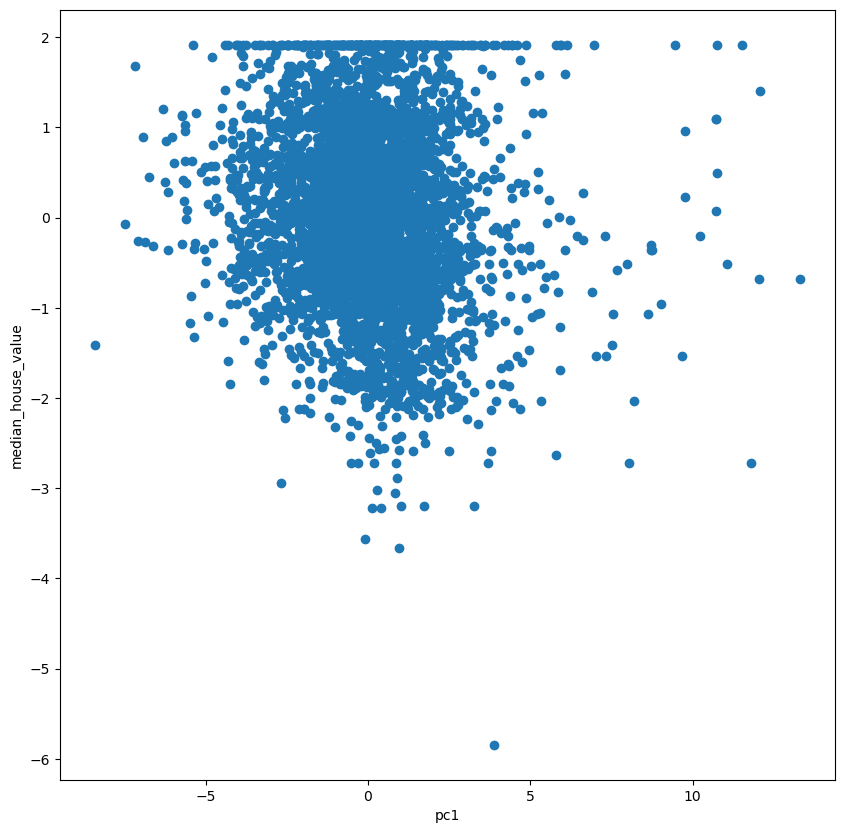

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],train['median_house_value'])
plt.xlabel('pc1')
plt.ylabel('median_house_value')

Text(0, 0.5, 'median_house_value')

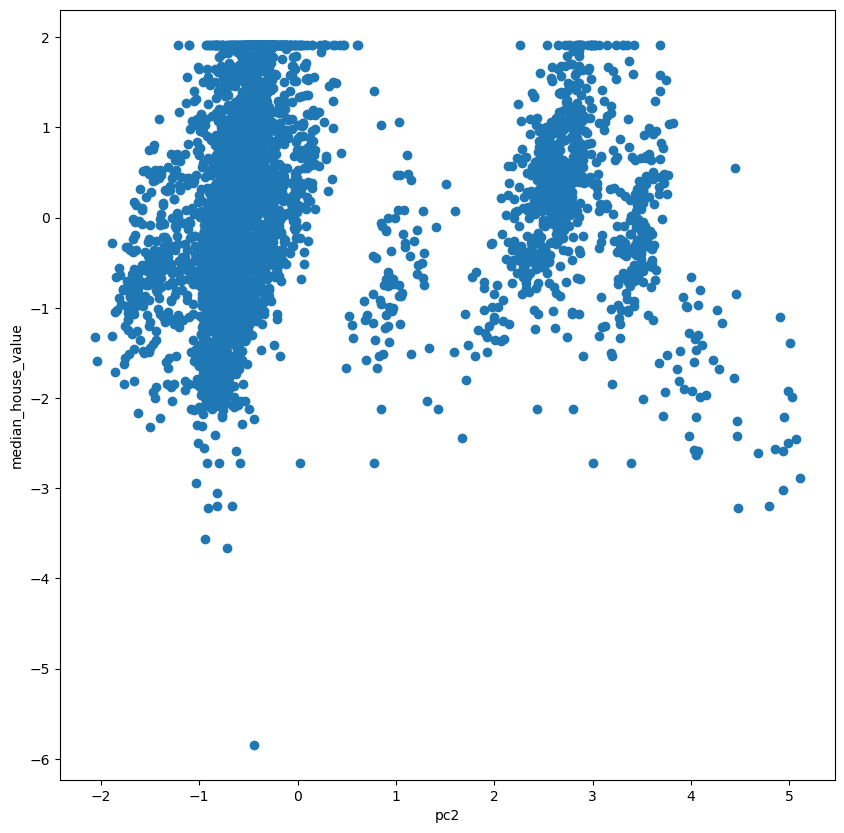

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,1],train['median_house_value'])
plt.xlabel('pc2')
plt.ylabel('median_house_value')


Text(0, 0.5, 'median_house_value')

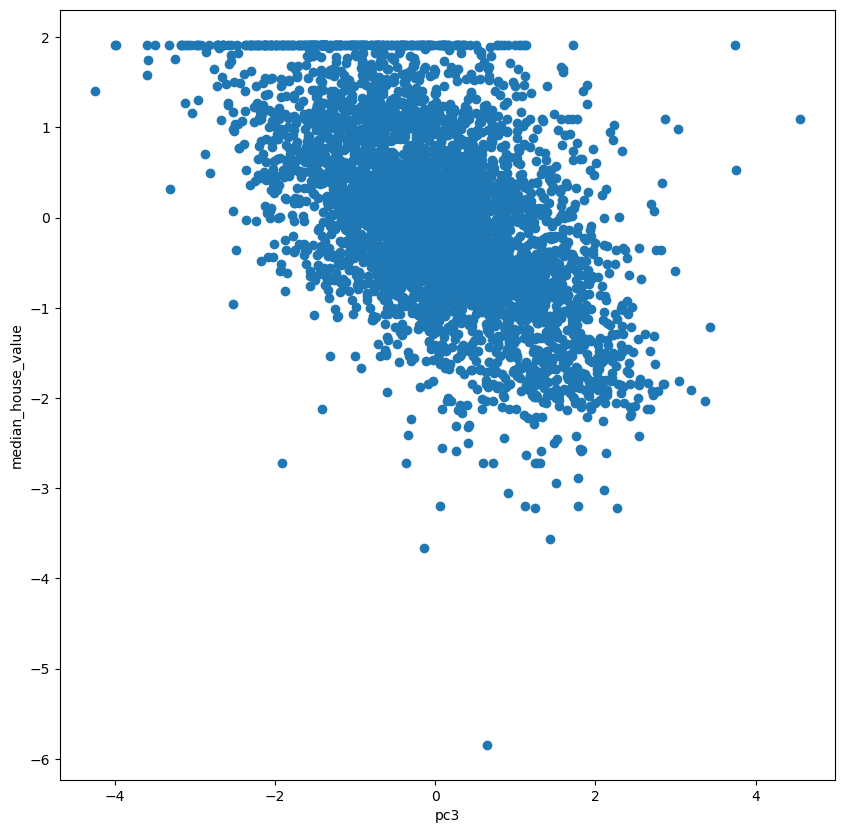

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,2],train['median_house_value'])
plt.xlabel('pc3')
plt.ylabel('median_house_value')

Видим, что распределение median_house_value относительно PC3 имеет линейную зависимость 

Построим модель линейной регрессии с помощью первых трех PC

In [58]:
PCA_ds_train = pd.DataFrame([x[:,0],
                  x[:,1],
                  x[:,2]])
PCA_ds_train = PCA_ds_train.T

principal=PCA(n_components=3)
principal.fit(test.drop(columns=['median_house_value']))
y=principal.transform(test.drop(columns=['median_house_value']))
PCA_ds_test= pd.DataFrame([y[:,0],
                  y[:,1],
                  y[:,2]])
PCA_ds_test = PCA_ds_test.T

In [59]:
from sklearn.linear_model import LinearRegression

model =  LinearRegression() 
model.fit(PCA_ds_train, train['median_house_value'])

pred_train = model.predict(PCA_ds_train)
pred_test = model.predict(PCA_ds_test)

print("Train MSE", mean_squared_error(train['median_house_value'],pred_train))
print("Test MSE", mean_squared_error(test['median_house_value'],pred_test))

Train MSE 0.6661905366467274
Test MSE 1.9179255337758867


MSE на тестовых данных, обработанных с помощью PCA является самым большим из тех, что мы получали в этой работе. На трехмерном графике видно, что данные представляют собой 3 размазанных кластера

# Вывод

Результаты, полученные в ходе работы показывают, что используемый датасет плохо подходит для обучения модели линейной регрессии, даже пре использовании регуляризации и создания новых признаков PCA 